# **AI-Based Personalized Learning System Using Student Quiz Performance**

**Project Overview:**

This project focuses on building an AI-driven personalized learning system that analyzes student quiz performance and provides intelligent tutoring recommendations.

The system evaluates how a student performs in quizzes based on factors such as:

**Quiz score:**

1. Time taken to answer questions

2. Number of attempts

3. Subject and grade level

Using a machine learning model, the system predicts whether a student requires additional tutoring support or is performing well enough to move to higher difficulty levels.

**Real-world relevance and motivation:**



*   Helps predict a student’s future academic performance using current quiz behavior, enabling early academic intervention.

*   Identifies whether a student may need tutoring based on score, time taken, and attempts — similar to real e-learning platforms.



*   Demonstrates how machine learning models are used in real educational systems to automate performance evaluation.

*   Inspired by real-world EdTech platforms like Coursera, Byju’s, and Khan Academy that use data to improve student outcomes.

**Data Understanding & Preparation:**



*   The dataset includes student quiz scores, time taken, number of attempts, subject encoding, and grade level to capture learning behavior.

*   The dataset includes student quiz scores, time taken, number of attempts, subject encoding, and grade level to capture learning behavior.



*   The dataset was split into training and testing sets to ensure fair evaluation and avoid overfitting.


**Model / System Design & Core Implementation:**

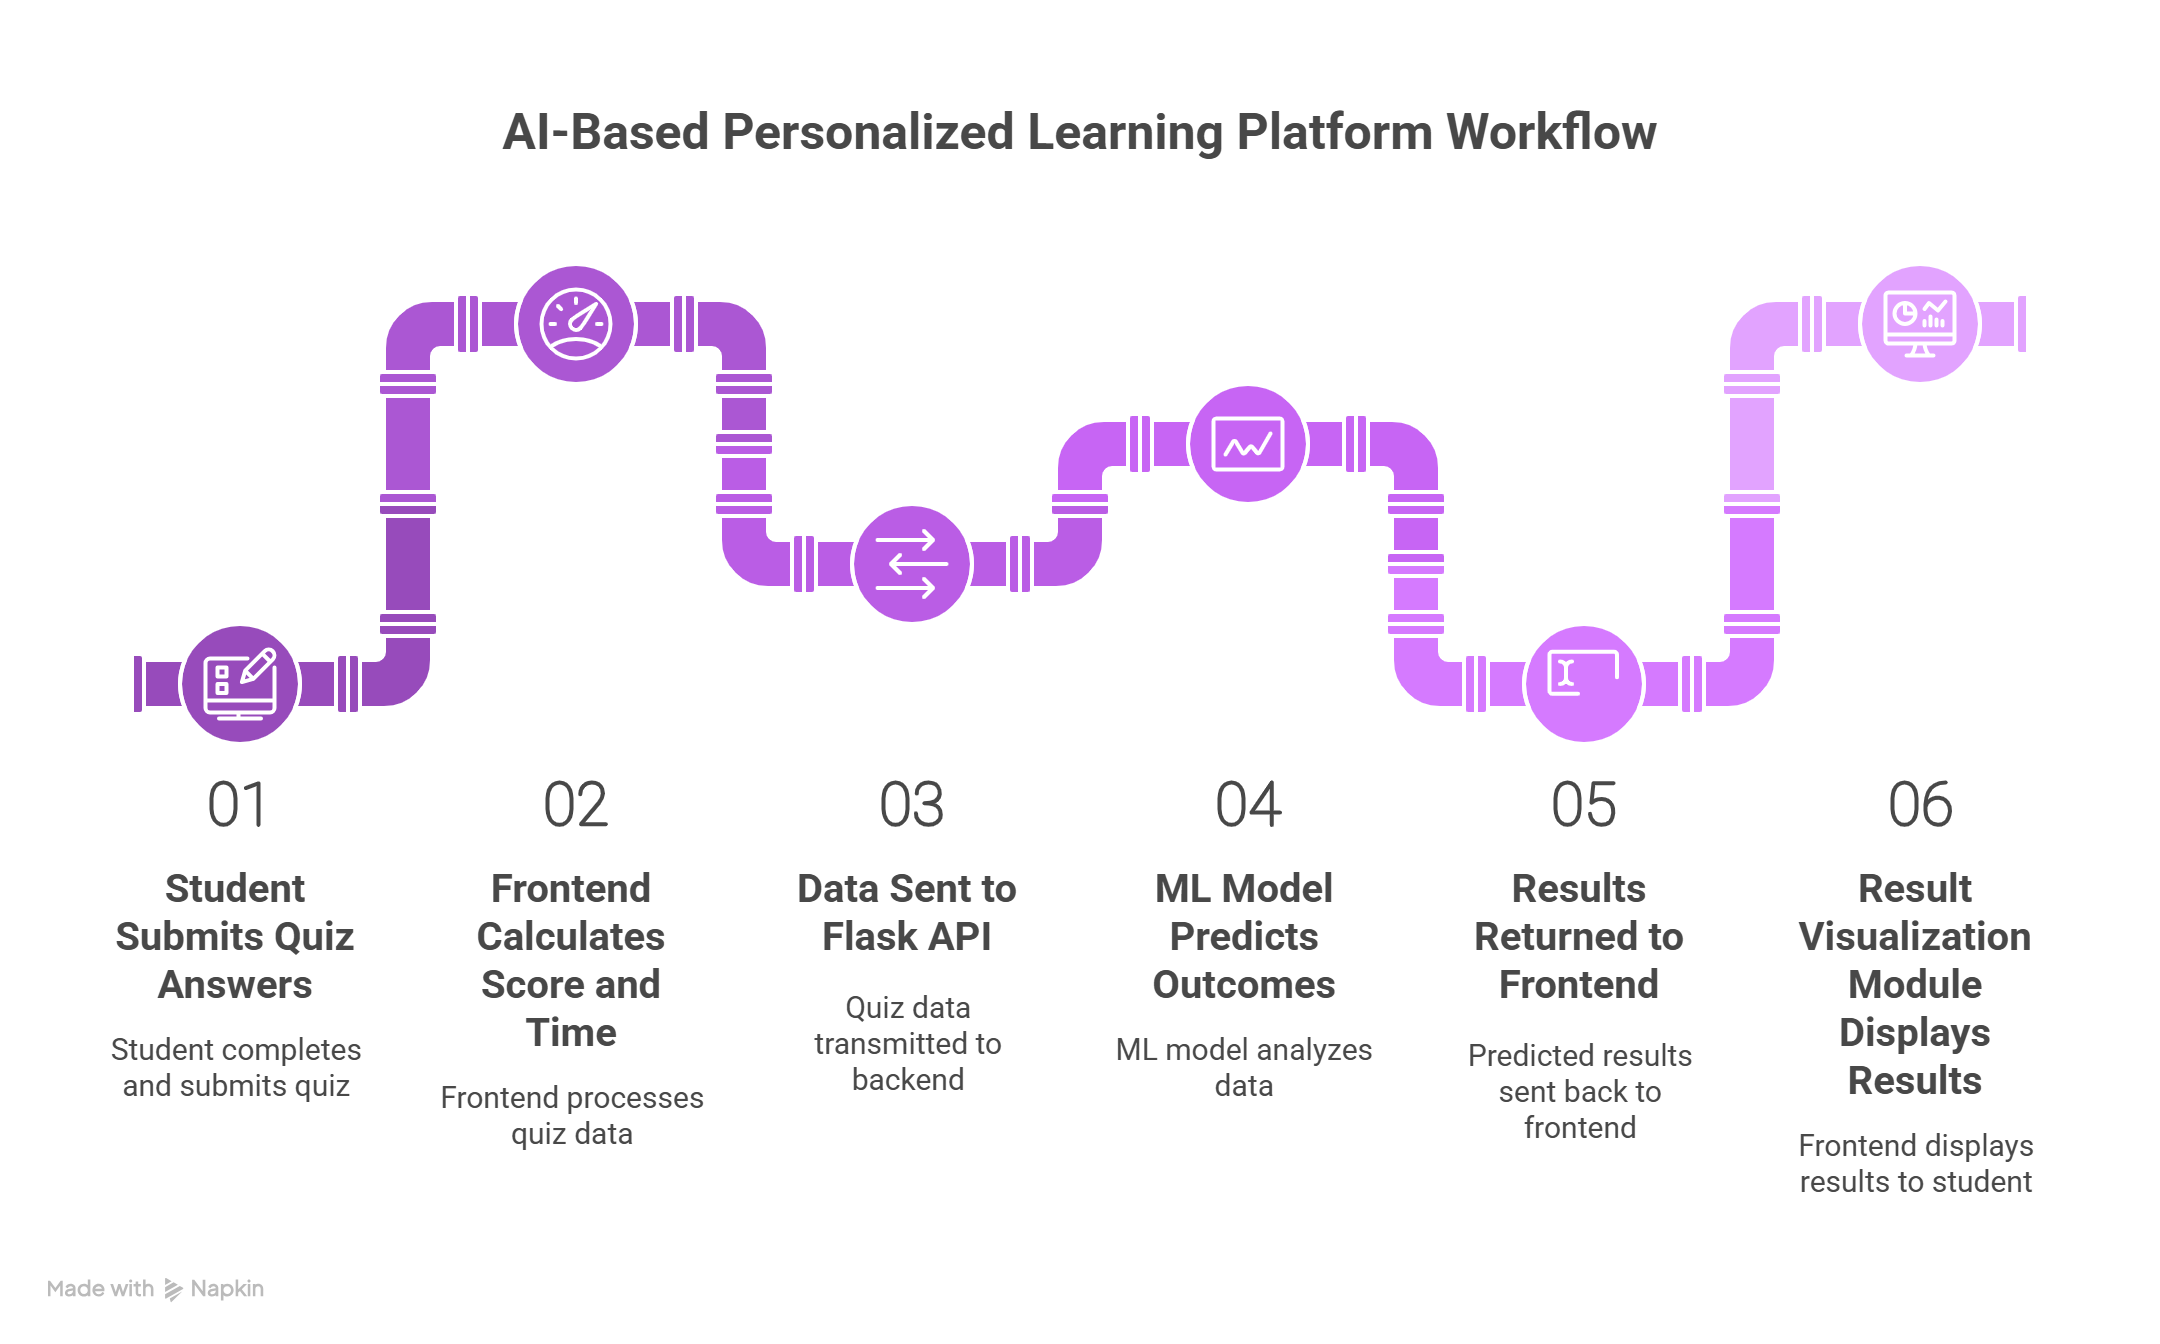


**Ethical Considerations & Responsible AI:**

1. Student data is used only for learning analysis, without storing personal or sensitive information.

2. Model predictions are assistive, not judgmental, ensuring fair learning support for all students.

3. The system promotes transparency by clearly explaining performance feedback and recommendations.

**Conclusion & Future Scope:**

1. The project successfully integrates machine learning with a web application for personalized learning analysis.

2. Future improvements can include adaptive quizzes, real-time learning recommendations, and advanced AI chat support.

3. The system can be scaled for schools and e-learning platforms to support data-driven education.




In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("student-quiz-dataset.csv")
df.head()

,student_id,student_name,grade_level,subject,quiz_id,quiz_title,quiz_date,score,max_score,completed,time_taken_minutes,attempt_number,tutoring_recommended,curriculum_flag,teacher_id
0,STU1024,Ava Chen,Grade 8,Mathematics,MATHQZ101,Algebra Basics Quiz,2024-03-04,92.5,100,True,38.7,1,False,False,TCH201
1,STU1032,Samuel Lee,Grade 7,Science,SCI107,Basic Chemistry,2024-02-27,55.0,100,True,42.3,1,True,False,TCH301
2,STU1101,Isabella Gomez,Grade 9,History,HIST210,World War II Overview,2024-03-10,77.0,100,True,29.8,1,False,False,TCH403
3,STU1042,Noah Patel,Grade 8,English,ENG302,Essay Writing Skills,2024-03-06,66.5,100,True,51.2,1,False,False,TCH112
4,STU1076,Layla Brown,Grade 7,Mathematics,MATHQZ101,Algebra Basics Quiz,2024-03-04,48.0,100,True,60.5,2,True,True,TCH201


# **Data Pre-Processing**

In [ ]:
columns_to_drop = [
    "student_id",
    "student_name",
    "quiz_id",
    "quiz_title",
    "quiz_date",
    "completed",
    "curriculum_flag",
    "teacher_id"
]

df = df.drop(columns=columns_to_drop, errors='ignore')
print('Remaining Columns: ')
print(df.columns)
df.head()

Remaining Columns: 
Index(['grade_level', 'subject', 'score', 'max_score', 'time_taken_minutes',
       'attempt_number', 'tutoring_recommended'],
      dtype='object')


,grade_level,subject,score,max_score,time_taken_minutes,attempt_number,tutoring_recommended
0,Grade 8,Mathematics,92.5,100,38.7,1,False
1,Grade 7,Science,55.0,100,42.3,1,True
2,Grade 9,History,77.0,100,29.8,1,False
3,Grade 8,English,66.5,100,51.2,1,False
4,Grade 7,Mathematics,48.0,100,60.5,2,True


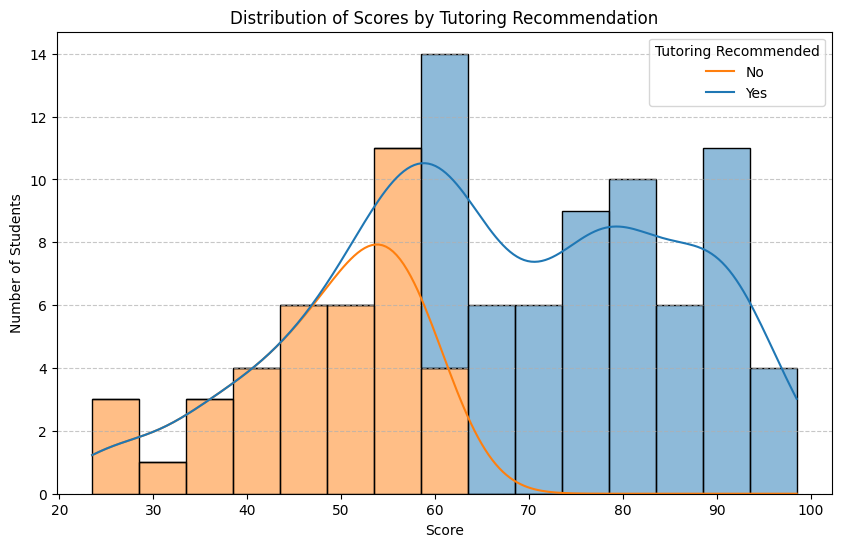

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', hue='tutoring_recommended', multiple='stack', bins=15, kde=True)
plt.title('Distribution of Scores by Tutoring Recommendation')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend(title='Tutoring Recommended', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#handle missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.describe()

,score,max_score,time_taken_minutes,attempt_number
count,100.000000,100.0,100.000000,100.000000
mean,66.407000,100.0,38.387097,1.330000
std,18.261287,0.0,10.948320,0.472582
min,23.500000,100.0,17.300000,1.000000
25%,54.150000,100.0,31.200000,1.000000
50%,65.300000,100.0,38.387097,1.000000
75%,81.125000,100.0,43.300000,2.000000
max,98.500000,100.0,65.000000,2.000000


In [ ]:
# Number of unique subjects
num_subjects = df['subject'].nunique()
unique_subjects = df['subject'].unique()

# Number of unique grade levels
num_grade_levels = df['grade_level'].nunique()
unique_grade_levels = df['grade_level'].unique()

print("Number of subjects:", num_subjects)
print("Subjects:", unique_subjects)

print("\nNumber of grade levels:", num_grade_levels)
print("Grade levels:", unique_grade_levels)

Number of subjects: 5
Subjects: ['Mathematics' 'Science' 'History' 'English' 'Geography']

Number of grade levels: 10
Grade levels: ['Grade 8' 'Grade 7' 'Grade 9' 'Grade 10' 'Year 2' 'Grade 11' 'Year 1'
 'Year 9' 'Year 10' 'Year 8']


# **Label Encoding of Categorical Columns**

In this step, we convert categorical features (subject and grade_level) into numerical values using Label Encoding.

Machine learning models cannot directly process text data, so categorical values must be transformed into numbers.

Math → 0

Science → 1

English → 2


In [ ]:
from sklearn.preprocessing import LabelEncoder

subject_encoder = LabelEncoder()
grade_encoder = LabelEncoder()

# Fit and transform
df['subject_encoded'] = subject_encoder.fit_transform(df['subject'])
df['grade_level_encoded'] = grade_encoder.fit_transform(df['grade_level'])

print(df[['subject', 'subject_encoded']].drop_duplicates())
print(df[['grade_level', 'grade_level_encoded']].drop_duplicates())

        subject  subject_encoded
0   Mathematics                3
1       Science                4
2       History                2
3       English                0
46    Geography                1
   grade_level  grade_level_encoded
0      Grade 8                    3
1      Grade 7                    2
2      Grade 9                    4
46    Grade 10                    0
47      Year 2                    7
50    Grade 11                    1
52      Year 1                    5
91      Year 9                    9
93     Year 10                    6
95      Year 8                    8


In [ ]:
df.head()

,grade_level,subject,score,max_score,time_taken_minutes,attempt_number,tutoring_recommended,subject_encoded,grade_level_encoded
0,Grade 8,Mathematics,92.5,100,38.7,1,False,3,3
1,Grade 7,Science,55.0,100,42.3,1,True,4,2
2,Grade 9,History,77.0,100,29.8,1,False,2,4
3,Grade 8,English,66.5,100,51.2,1,False,0,3
4,Grade 7,Mathematics,48.0,100,60.5,2,True,3,2


In [ ]:
import pickle

with open("subject_encoder.pkl", "wb") as f:
    pickle.dump(subject_encoder, f)

with open("grade_encoder.pkl", "wb") as f:
    pickle.dump(grade_encoder, f)


In [ ]:
print(df['tutoring_recommended'].unique())

[False  True]


In [ ]:
df['tutoring_recommended'] = df['tutoring_recommended'].astype(int)
df.head()

,grade_level,subject,score,max_score,time_taken_minutes,attempt_number,tutoring_recommended,subject_encoded,grade_level_encoded
0,Grade 8,Mathematics,92.5,100,38.7,1,0,3,3
1,Grade 7,Science,55.0,100,42.3,1,1,4,2
2,Grade 9,History,77.0,100,29.8,1,0,2,4
3,Grade 8,English,66.5,100,51.2,1,0,0,3
4,Grade 7,Mathematics,48.0,100,60.5,2,1,3,2


# **Dropping Original Categorical Columns**

After encoding the categorical columns (subject and grade_level) into numerical form, the original text columns are no longer needed.

Therefore, we remove them from the dataset using the drop() function.

In [ ]:
df = df.drop(['subject', 'grade_level'], axis=1)
print(df.columns)

Index(['score', 'max_score', 'time_taken_minutes', 'attempt_number',
       'tutoring_recommended', 'subject_encoded', 'grade_level_encoded'],
      dtype='object')


In [ ]:
df.head()

,score,max_score,time_taken_minutes,attempt_number,tutoring_recommended,subject_encoded,grade_level_encoded
0,92.5,100,38.7,1,0,3,3
1,55.0,100,42.3,1,1,4,2
2,77.0,100,29.8,1,0,2,4
3,66.5,100,51.2,1,0,0,3
4,48.0,100,60.5,2,1,3,2


# **Splitting Data into Training and Testing Sets**

**Features (X):**
score, max_score, time_taken_minutes, attempt_number, subject_encoded, grade_level_encoded

**Target (y):**
tutoring_recommended, which the model will learn to predict

Training set (80%) → used to train the model

Testing set (20%) → used to evaluate model performance

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['score', 'max_score', 'time_taken_minutes', 'attempt_number', 'subject_encoded','grade_level_encoded']]
y = df['tutoring_recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



# **Training the Random Forest Model**

RandomForestClassifier is an ensemble learning method that combines multiple decision trees to improve prediction accuracy.

**n_estimators**=200 specifies the number of decision trees in the forest.

**random_state**=42 ensures reproducible results.

**max_depth**=None allows trees to grow fully without depth restriction.

The model is trained using the training data (X_train, y_train).
After training, we use the trained model to predict outcomes on the test dataset (X_test).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# **Feature Importance Analysis**

After training the Random Forest model, we analyze feature importance to understand which input features contribute most to the model’s predictions.

1. feature_importances_ provides the relative importance score of each feature.

2. We pair each feature name with its importance value.

3. The results are stored in a DataFrame and sorted in descending order.

This helps in:

1. Interpreting the model’s decisions

2. Identifying the most influential features

3. Improving feature selection and model understanding

In [ ]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns

pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

,Feature,Importance
0,score,0.760686
2,time_taken_minutes,0.150429
5,grade_level_encoded,0.051402
4,subject_encoded,0.025121
3,attempt_number,0.012362
1,max_score,0.000000


# **Tutoring Recommendation Prediction**

This function predicts whether a student needs tutoring based on their quiz performance and encoded information.

1. It takes student details such as score, time taken, subject, grade level, and attempt number as input.

2. The input data is converted into a NumPy array in the format required by the trained model.

3. The trained Random Forest model is used to:

Predict the tutoring recommendation (Yes/No)

Calculate the probability that tutoring is needed

The numeric prediction is converted into a human-readable message.

The function returns:

1. Prediction result (0 or 1)

2. Probability of needing tutoring

3. Clear recommendation message

In [ ]:
import numpy as np

def predict_tutoring_needed(
    score,
    max_score,
    time_taken_minutes,
    subject_encoded,
    grade_level_encoded,
    attempt_number,
    model=rf
):
    """
    Predict whether a student needs tutoring based on quiz performance.
    """

    # create input array (1 sample, 6 features)
    input_data = np.array([[
        score,
        max_score,
        time_taken_minutes,
        subject_encoded,
        grade_level_encoded,
        attempt_number
    ]])

    # model prediction
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]   # probability student needs tutoring

    # convert numeric prediction to human-readable text
    if pred == 1:
        message = "Tutoring Recommended"
    else:
        message = "No Tutoring Needed"

    return {
        "prediction": int(pred),
        "probability": float(prob),
        "message": message
    }


In [ ]:
predict_tutoring_needed(
    score=45,
    max_score=100,
    time_taken_minutes=12,
    subject_encoded=2,
    grade_level_encoded=1,
    attempt_number=1
)

predict_tutoring_needed(
    score=92,
    max_score=100,
    time_taken_minutes=4,
    subject_encoded=0,
    grade_level_encoded=2,
    attempt_number=1
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


{'prediction': 0, 'probability': 0.035, 'message': 'No Tutoring Needed'}

# **Saving the Trained Model**

In this step, the trained Random Forest model is saved to a file using pickle.

1. The model is stored as student_performance_model.pkl

2. Saving the model allows it to be reused later without retraining

3. The file can be loaded for deployment or future predictions


A confirmation message is printed to indicate that the model was saved successfully.


In [ ]:
# Save the model to a file
with open("student_performance_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved successfully as student_performance_model.pkl")

Model saved successfully as student_performance_model.pkl


# **Future Score Prediction Model**
This is our 2nd feature in our website for predicting future score of student.

1. This model predicts a student’s future test score based on past performance, time taken, number of attempts, subject, and grade level.

2. It uses regression techniques to identify learning patterns and estimate academic improvement.

3. The prediction helps in early intervention, enabling personalized tutoring and study recommendations.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

In [ ]:
df["future_score"] = (
    df["score"]
    + np.random.randint(3, 12, size=len(df))
    - df["tutoring_recommended"] * 2
)

# Keep scores realistic
df["future_score"] = df["future_score"].clip(0, df["max_score"])

In [ ]:
X = df[
    [
        "score",
        "time_taken_minutes",
        "attempt_number",
        "tutoring_recommended",
        "subject_encoded",
        "grade_level_encoded"
    ]
]

y = df["future_score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = RandomForestRegressor(
    n_estimators=150,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2.498699999999982
RMSE: 2.9000324097805628
R2 Score: 0.9756305477215429


# **Model Evaluation Results**

1. On average, the model’s predictions differ from the actual future score by only ~2.5 marks, indicating high prediction precision.

2. Low RMSE shows that large prediction errors are rare and the model remains stable across different students.

3. The model explains nearly 97.5% of the variance in future student performance, demonstrating strong generalization and learning capability.

In [ ]:
sample = np.array([[65, 25, 2, 1, 0, 10]])
prediction = model.predict(sample)

print("Predicted Future Score:", prediction[0])

Predicted Future Score: 72.63666666666668


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
with open("future_score_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully")

Model saved successfully


# **Actual vs Predicted Future Score**

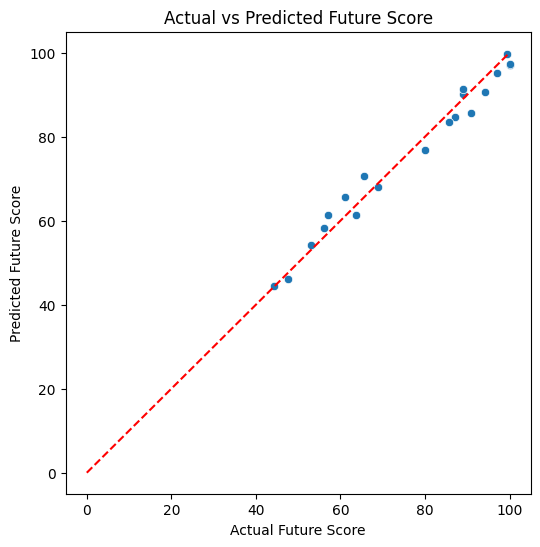

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# y_test -> actual future scores
# y_pred -> predicted future scores

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Future Score")
plt.ylabel("Predicted Future Score")
plt.title("Actual vs Predicted Future Score")
plt.show()

# **Prediction Error Distribution**

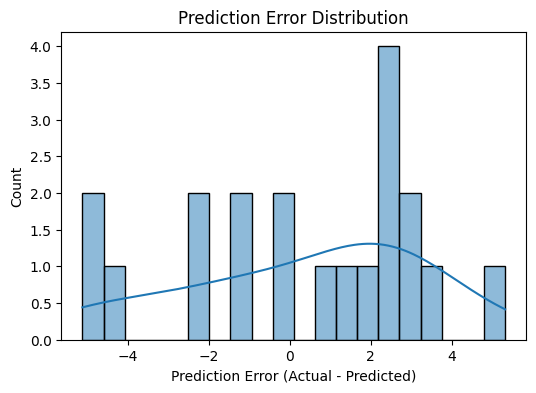

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.title("Prediction Error Distribution")
plt.show()

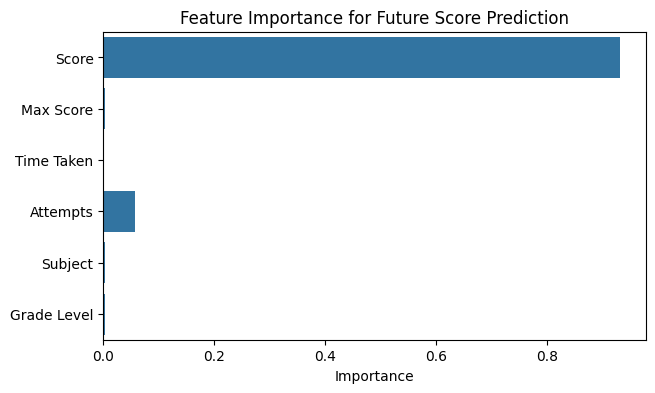

In [ ]:
features = [
    "Score",
    "Max Score",
    "Time Taken",
    "Attempts",
    "Subject",
    "Grade Level"
]

importance = model.feature_importances_

plt.figure(figsize=(7,4))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance for Future Score Prediction")
plt.xlabel("Importance")
plt.show()